In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [21]:
def train_test_split(data, training_ratio=0.7):
    train_sample_size = np.int_(data.shape[0]*training_ratio)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:, :]

# Regression for Univariate data

In [22]:
file = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Regression/BivariateData/10.csv'
df = pd.read_csv(file, header=None)
df.head()

,0,1,2
0,0.21,0.86,0.56319
1,0.24,0.95,0.52729
2,0.31,0.23,1.14150
3,0.98,0.42,1.78900
4,0.93,0.34,1.66360


In [23]:
data = df.to_numpy(dtype=float, copy=True)
data.shape

(10201, 3)

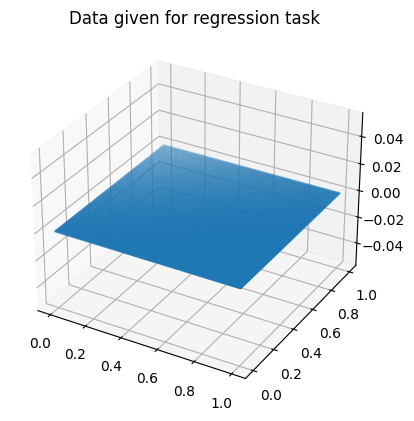

In [24]:
plt.axes(projection='3d')
plt.scatter(data[:, 0], data[:, 1], data[:, 2])
plt.title('Data given for regression task')
plt.show()

In [25]:
train_data, test_data = train_test_split(data)
train_data.shape, test_data.shape

((7140, 3), (3061, 3))

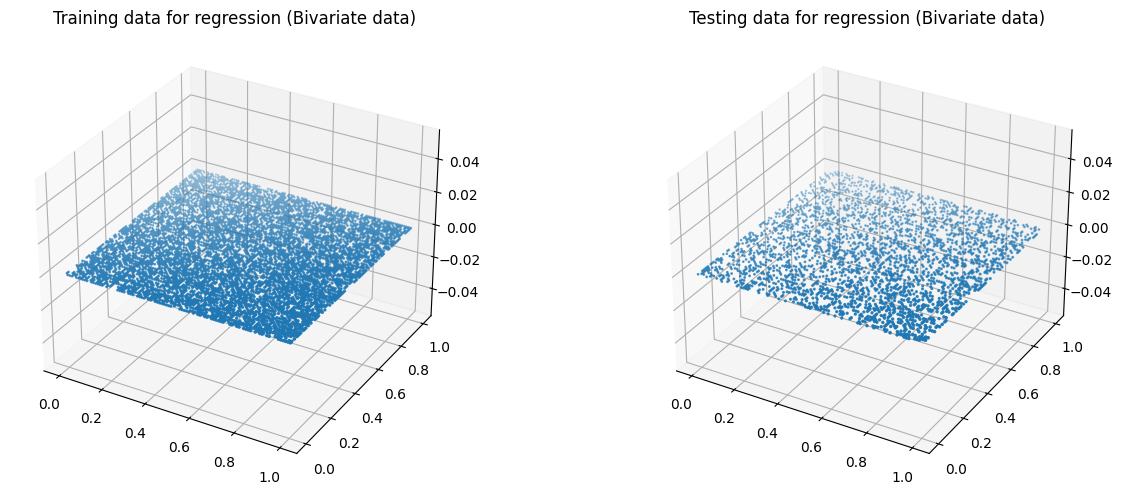

In [26]:
plt.subplot(1,2,1, projection='3d')
plt.scatter(train_data[:, 0], train_data[:, 1], train_data[:, 2])
plt.title('Training data for regression (Bivariate data)')

plt.subplot(1,2,2, projection='3d')
plt.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2])
plt.title('Testing data for regression (Bivariate data)')
plt.tight_layout(rect=[0, 0, 2, 1])
plt.show()